In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
from collections import Counter


In [90]:
#removed first line from file beforehand
#delete G column
df = pd.ExcelFile('EasyJetGatwickLGW_4.xlsx')
arrivals = pd.read_excel(df, 'Arrivals')
departures = pd.read_excel(df, 'Departures')

In [91]:
arrivals.head()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
0,2024-01-24,07:20:00,U28672,Amsterdam (AMS),easyJet,A20N (OE-LSP),Landed 07:33,07:33:00,00:13:00,Later
1,2024-01-24,07:30:00,U28402,Paris (CDG),easyJet,A320 (OE-ICM),Landed 07:17,07:17:00,00:13:00,Earlier
2,2024-01-24,07:35:00,U28486,Geneva (GVA),easyJet (NEO Livery),A320 (HB-JYD),Landed 07:30,07:30:00,00:05:00,Earlier
3,2024-01-24,07:40:00,U2806,Edinburgh (EDI),easyJet,A320 (G-EZTV),Landed 07:28,07:28:00,00:12:00,Earlier
4,2024-01-24,07:50:00,U2856,Aberdeen (ABZ),easyJet,A320 (G-EJCI),Landed 07:38,07:38:00,00:12:00,Earlier


In [92]:
departures.tail()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
6881,2024-03-20,19:45:00,U28631,Berlin (BER),easyJet,A320 (OE-IZN),Departed 20:57,20:57:00,01:12:00,Later
6882,2024-03-20,19:55:00,U28436,Lyon (LYS),easyJet,A319 (OE-LKY),Departed 20:06,20:06:00,00:11:00,Later
6883,2024-03-20,20:05:00,U28491,Geneva (GVA),easyJet,A320 (HB-JXK),Departed 20:12,20:12:00,00:07:00,Later
6884,2024-03-20,20:05:00,U28675,Amsterdam (AMS),easyJet,A20N (OE-LSJ),Departed 20:13,20:13:00,00:08:00,Later
6885,2024-03-20,20:25:00,U2833,Belfast (BFS),easyJet,A20N (G-UZLT),Departed 20:44,20:44:00,00:19:00,Later


In [93]:
arrivals.shape

(7294, 10)

In [94]:
departures.shape

(6886, 10)

In [95]:
arr_cols = list(arrivals.columns)
arr_cols

['DATE',
 'TIME',
 'FLIGHT',
 'FROM',
 'AIRLINE',
 'AIRCRAFT',
 'STATUS',
 'STATUS_TIME',
 'TIME DIFFERENCES',
 'Late or Early']

In [96]:
arr_cols = list(departures.columns)
arr_cols

['DATE',
 'TIME',
 'FLIGHT',
 'FROM',
 'AIRLINE',
 'AIRCRAFT',
 'STATUS',
 'STATUS_TIME',
 'TIME DIFFERENCES',
 'Late or Early']

In [97]:
# putting CANCELED flights on a different dataframe
canceled_arrivals = arrivals[arrivals['STATUS']=="Canceled"]
canceled_arrivals.head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
589,2024-01-31,17:09:00,U29091,Teesside (MME),easyJet,A319,Canceled,Canceled,NaN,Later
1162,2024-02-06,14:52:00,U29003,Berlin (BER),easyJet,A320 (G-EZWP),Canceled,Canceled,NaN,Later
1229,2024-02-07,14:46:00,U29001,Bristol (BRS),easyJet,A319 (G-EZBY),Canceled,Canceled,NaN,Later


In [98]:
import plotly.express as px
import pandas as pd

# Group by arrival airport and count canceled flights
canceled_by_arr = arrivals[arrivals['STATUS'] == 'Canceled'].groupby('FROM')['STATUS'].count()

# Calculate the total flights for each airport
total_flights_by_arr = arrivals.groupby('FROM')['STATUS'].count()

# Calculate the percentage of canceled flights for each airport
cancel_rate_by_airport = (canceled_by_arr / total_flights_by_arr) * 100

# Remove NaN values
cancel_rate_by_airport = cancel_rate_by_airport.dropna()

# Sort the airports by cancel rate in descending order
sorted_cancel_rates = cancel_rate_by_airport.sort_values(ascending=False)

# Create a DataFrame with additional information
data = pd.DataFrame({
    'Airport': sorted_cancel_rates.index,
    'Percentage': sorted_cancel_rates.values,
    'Total Flights': total_flights_by_arr[sorted_cancel_rates.index],
    'Canceled Flights': canceled_by_arr[sorted_cancel_rates.index]
})

# Create an interactive treemap
fig = px.treemap(data, 
                 path=['Airport'], 
                 values='Percentage',
                 color='Percentage',
                 color_continuous_scale='Viridis',
                 hover_data=['Total Flights', 'Canceled Flights'])

# Customize the layout
fig.update_layout(
    title='Percentage of Canceled Flights by Arrival Airport',
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(size=14)
)

# Add a color bar
fig.update_layout(coloraxis_colorbar=dict(
    title="Percentage of Canceled Flights",
    tickvals=[0, 25, 50, 75, 100],
    ticktext=[f"{val}%" for val in [0, 25, 50, 75, 100]]
))

fig.show()

In [99]:
canceled_departues = departures[departures['STATUS']=="Canceled"] 
canceled_departues.head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
583,2024-01-31,09:00:00,U29090,Teesside (MME),easyJet,A319 (G-EZDM),Canceled,NaN,NaN,NaN
904,2024-02-04,06:15:00,U29007,Bristol (BRS),easyJet,A21N (G-UZMC),Canceled,NaN,NaN,NaN
1211,2024-02-07,00:11:00,U22914,Bristol (BRS),easyJet,A20N (G-UZHL),Canceled,NaN,NaN,NaN


In [100]:
import plotly.express as px
import pandas as pd

# Group by arrival airport and count canceled flights
canceled_by_arr = departures[departures['STATUS'] == 'Canceled'].groupby('FROM')['STATUS'].count()

# Calculate the total flights for each airport
total_flights_by_arr = departures.groupby('FROM')['STATUS'].count()

# Calculate the percentage of canceled flights for each airport
cancel_rate_by_airport = (canceled_by_arr / total_flights_by_arr) * 100

# Remove NaN values
cancel_rate_by_airport = cancel_rate_by_airport.dropna()

# Sort the airports by cancel rate in descending order
sorted_cancel_rates = cancel_rate_by_airport.sort_values(ascending=False)

# Create a DataFrame with additional information
data = pd.DataFrame({
    'Airport': sorted_cancel_rates.index,
    'Percentage': sorted_cancel_rates.values,
    'Total Flights': total_flights_by_arr[sorted_cancel_rates.index],
    'Canceled Flights': canceled_by_arr[sorted_cancel_rates.index]
})

# Create an interactive bar chart
fig = px.bar(data, 
              x='Percentage', 
              y='Airport', 
              orientation='h',
              color='Percentage',
              color_continuous_scale='Viridis',
              hover_data=['Total Flights', 'Canceled Flights'],
              labels={'Airport': 'Departure Airport',
                       'Percentage': 'Percentage of Canceled Flights',
                       'Total Flights': 'Total Flights',
                       'Canceled Flights': 'Canceled Flights'}
)

# Customize the layout
fig.update_layout(
    title='Percentage of Canceled Flights by Departure Airport',
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(size=14)
)

# Add a color bar
fig.update_layout(coloraxis_colorbar=dict(
    title="Percentage of Canceled Flights",
    tickvals=[0, 25, 50, 75, 100],
    ticktext=[f"{val}%" for val in [0, 25, 50, 75, 100]]
))

fig.show()

In [101]:
# dropping UNKNOWNS, CANCELED and SCHEDULED flights:
arrivals = arrivals.drop(arrivals[(arrivals['STATUS'] == 'Unknown') | (arrivals['STATUS_TIME'] == 'Unknown') | (arrivals['STATUS'] == 'Scheduled') | (arrivals['STATUS'] == 'Canceled')].index)


In [102]:
# dropping UNKNOWNS, CANCELED and SCHEDULED flights:
departures = departures.drop(departures[(departures['STATUS'] == 'Unknown') | (departures['STATUS'] == 'Canceled')].index)


In [103]:
arrivals.shape

(7188, 10)

In [104]:
departures.shape

(6857, 10)

In [105]:
# putting DIVERTED and ESTIMATED flights on a different dataframe:
div_est_arrivals = arrivals[arrivals['TIME DIFFERENCES'].apply(lambda x: isinstance(x, float))]
div_est_arrivals.head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
944,2024-02-04,15:30:00,U28520,Funchal (FNC),easyJet,A21N (G-UZMJ),Diverted to LIS,Diverted to LIS,NaN,Later
1391,2024-02-08,21:35:00,U28686,Amsterdam (AMS),easyJet,A320 (G-EJCC),Diverted to LTN,Diverted to LTN,NaN,Later
1406,2024-02-08,22:35:00,U28330,Rome (FCO),easyJet,A320 (G-EJCD),Diverted to GVA,Diverted to GVA,NaN,Later


In [106]:
div_est_departures = departures[departures['TIME DIFFERENCES'].apply(lambda x: isinstance(x, float))]
div_est_departures.head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
86,2024-01-25,13:00:00,U29001,Berlin (BER),easyJet,A320 (G-EZWZ),Estimated dep. 13:21,NaN,NaN,NaN
483,2024-01-29,14:00:00,NaN,Jersey (JER),easyJet,A320 (G-EJCG),Estimated dep. 14:20,NaN,NaN,NaN
484,2024-01-29,14:00:00,NaN,Jersey (JER),easyJet,A320 (G-EZOF),Estimated dep. 14:00,NaN,NaN,NaN


In [107]:
# REMOVING diverted and estimated flights from arrivals dataframe:
temp_arr = pd.concat([arrivals,div_est_arrivals]).drop_duplicates(keep=False)
arrivals = temp_arr

In [108]:
temp_dep = pd.concat([departures,div_est_departures]).drop_duplicates(keep=False)
departures = temp_dep

In [109]:
arrivals.head()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
0,2024-01-24,07:20:00,U28672,Amsterdam (AMS),easyJet,A20N (OE-LSP),Landed 07:33,07:33:00,00:13:00,Later
1,2024-01-24,07:30:00,U28402,Paris (CDG),easyJet,A320 (OE-ICM),Landed 07:17,07:17:00,00:13:00,Earlier
2,2024-01-24,07:35:00,U28486,Geneva (GVA),easyJet (NEO Livery),A320 (HB-JYD),Landed 07:30,07:30:00,00:05:00,Earlier
3,2024-01-24,07:40:00,U2806,Edinburgh (EDI),easyJet,A320 (G-EZTV),Landed 07:28,07:28:00,00:12:00,Earlier
4,2024-01-24,07:50:00,U2856,Aberdeen (ABZ),easyJet,A320 (G-EJCI),Landed 07:38,07:38:00,00:12:00,Earlier


In [110]:
departures.head()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
0,2024-01-24,06:55:00,U29006,Maastricht (MST),easyJet (NEO Livery),A20N (G-UZHD),Departed 06:57,06:57:00,00:02:00,Later
1,2024-01-24,07:10:00,U28339,Naples (NAP),easyJet,A20N (G-UZHJ),Departed 07:29,07:29:00,00:19:00,Later
2,2024-01-24,07:10:00,U28651,Pafos (PFO),easyJet,A20N (G-UJEC),Departed 07:19,07:19:00,00:09:00,Later
3,2024-01-24,07:15:00,U28693,Innsbruck (INN),easyJet,A320 (G-EZTG),Departed 07:24,07:24:00,00:09:00,Later
4,2024-01-24,07:25:00,U28129,Gran Canaria (LPA),easyJet,A320 (G-EZOM),Departed 07:34,07:34:00,00:09:00,Later


## Number of different arrivals or destinations

In [111]:
# number of different origin cities in arrivals
len(arrivals['FROM'].unique())

103

In [112]:
len(departures["FROM"].unique())

94

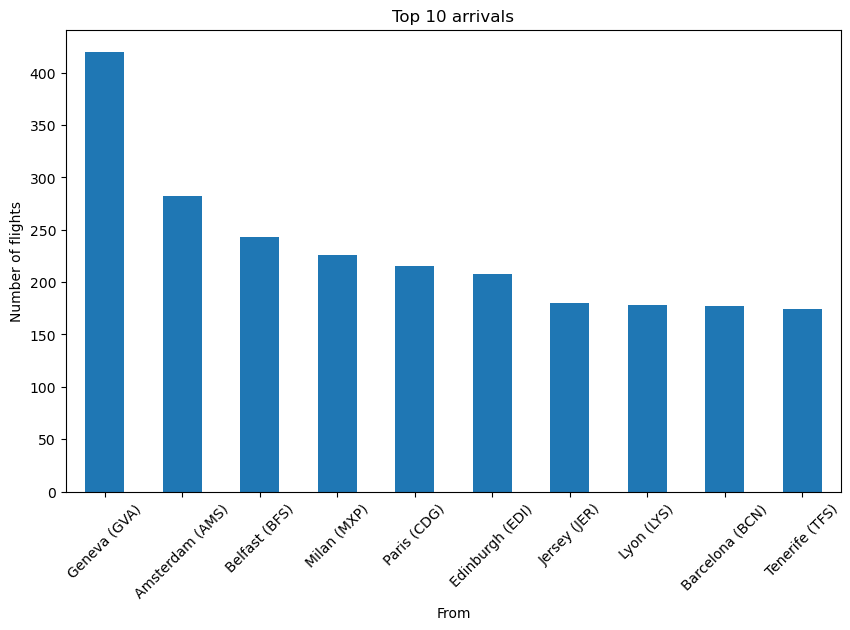

In [113]:
top_arrivals = arrivals['FROM'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_arrivals.plot(kind='bar')
plt.title('Top 10 arrivals')
plt.xlabel('From')
plt.ylabel('Number of flights')
plt.xticks(rotation=45)
plt.show()


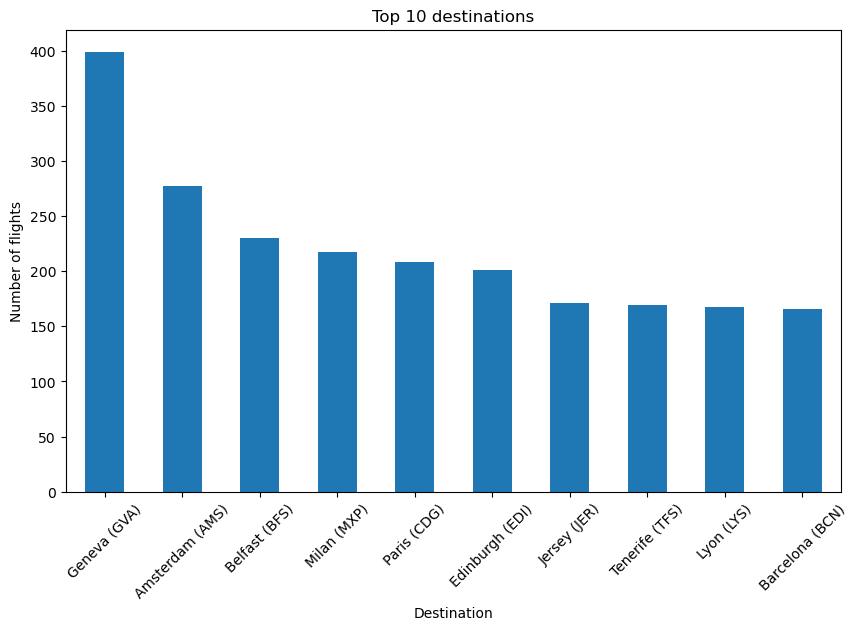

In [114]:
top_destinations = departures['FROM'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_destinations.plot(kind='bar')
plt.title('Top 10 destinations')
plt.xlabel('Destination')
plt.ylabel('Number of flights')
plt.xticks(rotation=45)
plt.show()

In [115]:
arrivals[arrivals['Late or Early']=='Earlier'].head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
1,2024-01-24,07:30:00,U28402,Paris (CDG),easyJet,A320 (OE-ICM),Landed 07:17,07:17:00,00:13:00,Earlier
2,2024-01-24,07:35:00,U28486,Geneva (GVA),easyJet (NEO Livery),A320 (HB-JYD),Landed 07:30,07:30:00,00:05:00,Earlier
3,2024-01-24,07:40:00,U2806,Edinburgh (EDI),easyJet,A320 (G-EZTV),Landed 07:28,07:28:00,00:12:00,Earlier


In [116]:
departures[departures['Late or Early']=='Earlier'].head(3)

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early
23,2024-01-24,12:15:00,U2857,Aberdeen (ABZ),easyJet (easyJet Holidays Livery),A320 (G-EZOA),Departed 12:12,12:12:00,00:03:00,Earlier
41,2024-01-24,16:45:00,U26565,Edinburgh (EDI),easyJet,A320 (G-EJCK),Departed 16:42\t,16:42:00,00:03:00,Earlier
45,2024-01-24,18:55:00,U2849,Inverness (INV),easyJet,A20N (G-UZHJ),Departed 18:55\t,18:55:00,00:00:00,Earlier


In [117]:
arrivals['STATUS_DETAIL'] = np.nan

In [118]:
departures['STATUS_DETAIL'] = np.nan

In [119]:
arrivals['Minute'] = arrivals['TIME DIFFERENCES'].apply(lambda x: x * 60 if isinstance(x, float) else x.hour * 60 + x.minute)

In [120]:
departures['Minute'] = departures['TIME DIFFERENCES'].apply(lambda x: x * 60 if isinstance(x, float) else x.hour * 60 + x.minute)

In [121]:
arrivals.head()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early,STATUS_DETAIL,Minute
0,2024-01-24,07:20:00,U28672,Amsterdam (AMS),easyJet,A20N (OE-LSP),Landed 07:33,07:33:00,00:13:00,Later,NaN,13
1,2024-01-24,07:30:00,U28402,Paris (CDG),easyJet,A320 (OE-ICM),Landed 07:17,07:17:00,00:13:00,Earlier,NaN,13
2,2024-01-24,07:35:00,U28486,Geneva (GVA),easyJet (NEO Livery),A320 (HB-JYD),Landed 07:30,07:30:00,00:05:00,Earlier,NaN,5
3,2024-01-24,07:40:00,U2806,Edinburgh (EDI),easyJet,A320 (G-EZTV),Landed 07:28,07:28:00,00:12:00,Earlier,NaN,12
4,2024-01-24,07:50:00,U2856,Aberdeen (ABZ),easyJet,A320 (G-EJCI),Landed 07:38,07:38:00,00:12:00,Earlier,NaN,12


In [122]:
departures.head()

,DATE,TIME,FLIGHT,FROM,AIRLINE,AIRCRAFT,STATUS,STATUS_TIME,TIME DIFFERENCES,Late or Early,STATUS_DETAIL,Minute
0,2024-01-24,06:55:00,U29006,Maastricht (MST),easyJet (NEO Livery),A20N (G-UZHD),Departed 06:57,06:57:00,00:02:00,Later,NaN,2
1,2024-01-24,07:10:00,U28339,Naples (NAP),easyJet,A20N (G-UZHJ),Departed 07:29,07:29:00,00:19:00,Later,NaN,19
2,2024-01-24,07:10:00,U28651,Pafos (PFO),easyJet,A20N (G-UJEC),Departed 07:19,07:19:00,00:09:00,Later,NaN,9
3,2024-01-24,07:15:00,U28693,Innsbruck (INN),easyJet,A320 (G-EZTG),Departed 07:24,07:24:00,00:09:00,Later,NaN,9
4,2024-01-24,07:25:00,U28129,Gran Canaria (LPA),easyJet,A320 (G-EZOM),Departed 07:34,07:34:00,00:09:00,Later,NaN,9


In [123]:
# filling the status detail column

for index, row in arrivals.iterrows():
    if row['Late or Early'] == 'Earlier':
        if row['TIME DIFFERENCES'].minute <= 15 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'Early'
        elif row['TIME DIFFERENCES'].minute >= 16 and row['TIME DIFFERENCES'].minute <= 30 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'Very early'
        elif row['TIME DIFFERENCES'].minute >= 31 and row['TIME DIFFERENCES'].minute < 60 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'Extremely early'
    
        
    else:
        if row['TIME DIFFERENCES'].minute <= 15 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'On time'
        elif row['TIME DIFFERENCES'].minute >= 16 and row['TIME DIFFERENCES'].minute <= 30 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'Late'
        elif row['TIME DIFFERENCES'].minute >= 31 and row['TIME DIFFERENCES'].minute < 60 and row['TIME DIFFERENCES'].hour == 0:
            arrivals.at[index,'STATUS_DETAIL'] = 'Very late'
        elif row['TIME DIFFERENCES'].hour >= 1:
            arrivals.at[index,'STATUS_DETAIL'] = 'Extremely late'
        

In [124]:
for index, row in departures.iterrows():
    if row['Late or Early'] == 'Earlier':
        if row['TIME DIFFERENCES'].minute <= 15 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'Early'
        elif row['TIME DIFFERENCES'].minute >= 16 and row['TIME DIFFERENCES'].minute <= 30 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'Very early'
        elif row['TIME DIFFERENCES'].minute >= 31 and row['TIME DIFFERENCES'].minute < 60 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'Extremely early'
    
        
    else:
        if row['TIME DIFFERENCES'].minute <= 15 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'On time'
        elif row['TIME DIFFERENCES'].minute >= 16 and row['TIME DIFFERENCES'].minute <= 30 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'Late'
        elif row['TIME DIFFERENCES'].minute >= 31 and row['TIME DIFFERENCES'].minute < 60 and row['TIME DIFFERENCES'].hour == 0:
            departures.at[index,'STATUS_DETAIL'] = 'Very late'
        elif row['TIME DIFFERENCES'].hour >= 1:
            departures.at[index,'STATUS_DETAIL'] = 'Extremely late'
        

In [125]:
status_arrivals_counts = arrivals['STATUS_DETAIL'].value_counts()
status_arrivals_counts

Early              2080
Very early         1423
Extremely late     1303
On time            1088
Late                541
Very late           467
Extremely early     200
Name: STATUS_DETAIL, dtype: int64

In [126]:
status_departures_counts = departures['STATUS_DETAIL'].value_counts()
status_departures_counts

On time           2386
Late              2323
Very late         1466
Extremely late     505
Early              137
Name: STATUS_DETAIL, dtype: int64

## Arrivals most occurences Early / Late

In [127]:
early_airport_arrives = arrivals.groupby(['FROM', 'STATUS_DETAIL']).size()

early_airport_arrives = early_airport_arrives.unstack()['Early']

early_airport_arrives = early_airport_arrives.sort_values(ascending=False)

print(early_airport_arrives)

FROM
Geneva (GVA)           136.0
Belfast (BFS)           81.0
Milan (MXP)             80.0
Amsterdam (AMS)         72.0
Paris (CDG)             69.0
                       ...  
Newquay (NQY)            NaN
Nimes (FNI)              NaN
Paris (CDG)              NaN
Paris (ORY)              NaN
Southend (SEN)           NaN
Name: Early, Length: 103, dtype: float64


In [128]:
late_airport_arrives = arrivals.groupby(['FROM', 'STATUS_DETAIL']).size()

late_airport_arrives = late_airport_arrives.unstack()['Late']

late_airport_arrives = late_airport_arrives.sort_values(ascending=False)

print(late_airport_arrives)

FROM
Geneva (GVA)           51.0
Belfast (BFS)          20.0
Amsterdam (AMS)        18.0
Edinburgh (EDI)        17.0
Milan (MXP)            17.0
                       ... 
Newquay (NQY)           NaN
Paris (CDG)             NaN
Paris (ORY)             NaN
Shannon (SNN)           NaN
Teesside (MME)          NaN
Name: Late, Length: 103, dtype: float64


## Departures most occurences Early / Late

In [129]:
early_airport_departures = departures.groupby(['FROM', 'STATUS_DETAIL']).size()

early_airport_departures = early_airport_departures.unstack()['Early']

early_airport_departures = early_airport_departures.sort_values(ascending=False)

print(early_airport_departures)

FROM
Belfast (BFS)         14.0
Aberdeen (ABZ)        11.0
Innsbruck (INN)       11.0
Amsterdam (AMS)       11.0
Jersey (JER)          10.0
                      ... 
Thessaloniki (SKG)     NaN
Toulouse (TLS)         NaN
Valencia (VLC)         NaN
Verona (VRN)           NaN
Zurich (ZRH)           NaN
Name: Early, Length: 94, dtype: float64


In [130]:
early_airport_departures = departures.groupby(['FROM', 'STATUS_DETAIL']).size()

early_airport_departures = early_airport_departures.unstack()['Late']

early_airport_departures = early_airport_departures.sort_values(ascending=False)

print(early_airport_departures)

FROM
Geneva (GVA)        127.0
Amsterdam (AMS)      83.0
Paris (CDG)          73.0
Milan (MXP)          71.0
Tenerife (TFS)       61.0
                    ...  
Girona (GRO)          NaN
London (LGW)          NaN
London (LTN)          NaN
Manchester (MAN)      NaN
Nimes (FNI)           NaN
Name: Late, Length: 94, dtype: float64


<Figure size 1000x600 with 0 Axes>

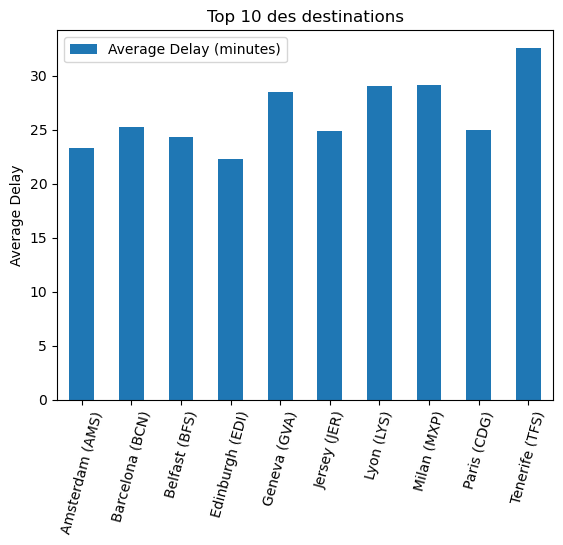

In [131]:
# Liste des destinations d'intérêt
destinations_interet = [
    'Geneva (GVA)', 'Amsterdam (AMS)', 'Belfast (BFS)', 'Milan (MXP)',
    'Paris (CDG)', 'Edinburgh (EDI)', 'Jersey (JER)', 'Tenerife (TFS)',
    'Lyon (LYS)', 'Barcelona (BCN)'
]

# Filtrer les données pour les vols arrivant aux destinations d'intérêt
data_filtered = departures[departures['FROM'].isin(destinations_interet)]

# Calculer le retard moyen pour chaque destination en utilisant la colonne 'DELAY_MINUTES'
retard_moyen_destinations = data_filtered.groupby('FROM')['Minute'].mean().reset_index()

# Renommer les colonnes pour plus de clarté
retard_moyen_destinations.columns = ['Destination', 'Average Delay (minutes)']

plt.figure(figsize=(10, 6))
retard_moyen_destinations.plot(kind='bar')
plt.title('Top 10 des destinations')
plt.xticks(range(len(retard_moyen_destinations)), retard_moyen_destinations['Destination'])
plt.ylabel('Average Delay')
plt.xticks(rotation=75)
plt.show()

<Figure size 1000x600 with 0 Axes>

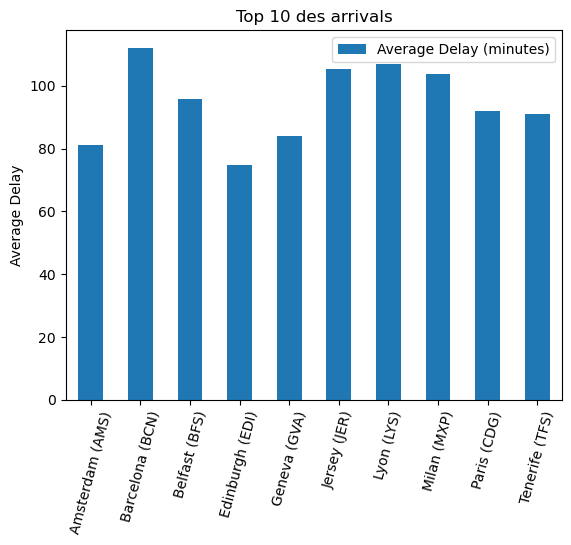

In [132]:
# Filtrer les données pour les vols arrivant aux destinations d'intérêt
data_filtered = arrivals[arrivals['FROM'].isin(destinations_interet)]

# Calculer le retard moyen pour chaque destination en utilisant la colonne 'DELAY_MINUTES'
retard_moyen_destinations = data_filtered.groupby('FROM')['Minute'].mean().reset_index()

# Renommer les colonnes pour plus de clarté
retard_moyen_destinations.columns = ['Arrivals', 'Average Delay (minutes)']

plt.figure(figsize=(10, 6))
retard_moyen_destinations.plot(kind='bar')
plt.title('Top 10 des arrivals')
plt.xticks(range(len(retard_moyen_destinations)), retard_moyen_destinations['Arrivals'])
plt.ylabel('Average Delay')
plt.xticks(rotation=75)
plt.show()

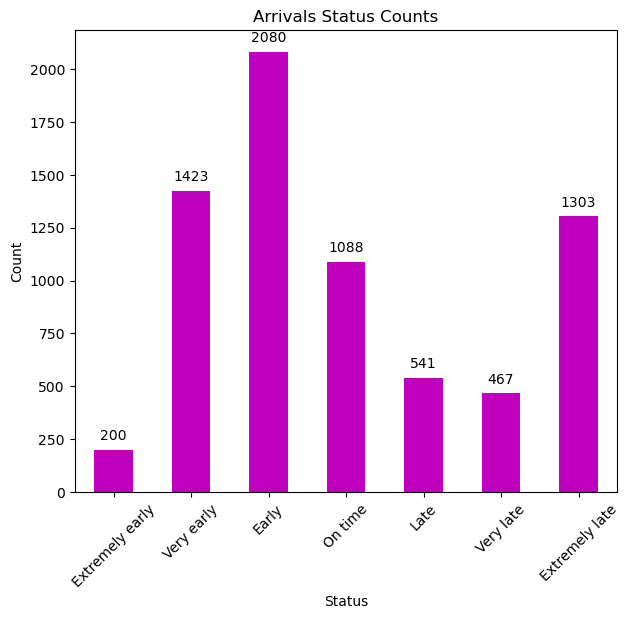

In [133]:
# Arrival value counts
status_arrivals_counts = arrivals['STATUS_DETAIL'].value_counts()

# Define the order of x-labels
desired_order = ['Extremely early', 'Very early', 'Early', 'On time', 'Late', 'Very late', 'Extremely late']

# Reindex the series to match the desired order
status_arrivals_counts = status_arrivals_counts.reindex(desired_order)

# Bar chart
plt.figure(figsize=(7, 6))
bars = status_arrivals_counts.plot(kind='bar', color = "m")

# Adding counts as annotations on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.title('Arrivals Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [134]:
# all the following process in the following cells is to create a dataframe grouping all late, very late and extremely late arrivals
grouped_arrivals = arrivals.groupby('STATUS_DETAIL')
grouped_departures = departures.groupby('STATUS_DETAIL')

In [135]:
early_arr = grouped_arrivals.get_group('Early')
veryearly_arr = grouped_arrivals.get_group('Very early')
extearly_arr = grouped_arrivals.get_group('Extremely early')
ontime_arr = grouped_arrivals.get_group('On time')
late_arr = grouped_arrivals.get_group('Late')
verylate_arr = grouped_arrivals.get_group('Very late')
extlate_arr = grouped_arrivals.get_group('Extremely late')

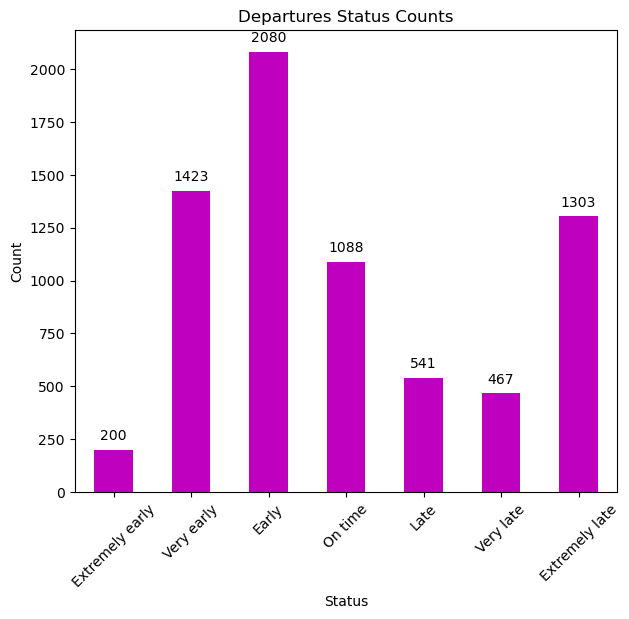

In [136]:
# Departures value counts
status_departures_counts = departures['STATUS_DETAIL'].value_counts()

# Define the order of x-labels
desired_order = ['Extremely early', 'Very early', 'Early', 'On time', 'Late', 'Very late', 'Extremely late']

# Reindex the series to match the desired order
status_departures_counts = status_departures_counts.reindex(desired_order)

# Bar chart
plt.figure(figsize=(7, 6))
bars = status_arrivals_counts.plot(kind='bar', color = "m")

# Adding counts as annotations on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.title('Departures Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## As there's no 'Very early' and 'Extremely Early' status for departures flights we're not gonna include them for departures

In [137]:
departures[departures['STATUS_DETAIL'] == 'Very early'].count()


DATE                0
TIME                0
FLIGHT              0
FROM                0
AIRLINE             0
AIRCRAFT            0
STATUS              0
STATUS_TIME         0
TIME DIFFERENCES    0
Late or Early       0
STATUS_DETAIL       0
Minute              0
dtype: int64

In [138]:
departures[departures['STATUS_DETAIL'] == 'Extremely early'].count()

DATE                0
TIME                0
FLIGHT              0
FROM                0
AIRLINE             0
AIRCRAFT            0
STATUS              0
STATUS_TIME         0
TIME DIFFERENCES    0
Late or Early       0
STATUS_DETAIL       0
Minute              0
dtype: int64

In [139]:
early_dep = grouped_departures.get_group('Early')
ontime_dep = grouped_departures.get_group('On time')
late_dep = grouped_departures.get_group('Late')
verylate_dep = grouped_departures.get_group('Very late')
extlate_dep = grouped_departures.get_group('Extremely late')

In [140]:
# getting cities FROM which flights are late
# l = late, vl = very late, el = extremely late
l_froms = list(late_arr['FROM'])
vl_froms = list(verylate_arr['FROM'])
el_froms = list(extlate_arr['FROM'])

In [141]:
l_froms_df = pd.DataFrame(Counter(l_froms), index=[0])
vl_froms_df = pd.DataFrame(Counter(vl_froms), index=[0])
el_froms_df = pd.DataFrame(Counter(el_froms), index=[0])

In [142]:
l_froms_dfT = l_froms_df.T.reset_index()
vl_froms_dfT = vl_froms_df.T.reset_index()
el_froms_dfT = el_froms_df.T.reset_index()

In [143]:
l_froms_dfT.columns = ["Origin", "Late"]
vl_froms_dfT.columns = ["Origin", "Very Late"]
el_froms_dfT.columns = ["Origin", "Extremely Late"]

In [144]:
lista_cdds = (list(l_froms_dfT['Origin'].unique()) + list(vl_froms_dfT['Origin'].unique()) + list(el_froms_dfT['Origin'].unique()))
lista_cdds = list(set(lista_cdds))

In [145]:
len(lista_cdds)

100

In [146]:
all_late_temp = l_froms_dfT.merge(vl_froms_dfT, how='outer', on='Origin')
all_late = all_late_temp.merge(el_froms_dfT, how='outer', on='Origin')

In [147]:
all_late.shape

(100, 4)

In [148]:
all_late.replace(np.nan,0,inplace=True)

In [149]:
all_late['Total'] = all_late['Late'] + all_late['Very Late'] + all_late['Extremely Late']

In [150]:
# dataframe containing ALL late, very late and extremely late cities, as well as the total number of times they appear
all_late.head()

,Origin,Late,Very Late,Extremely Late,Total
0,Maastricht (MST),1.0,1.0,0.0,2.0
1,Berlin (BER),17.0,12.0,22.0,51.0
2,Thessaloniki (SKG),2.0,1.0,5.0,8.0
3,Geneva (GVA),51.0,25.0,78.0,154.0
4,Milan (MXP),17.0,15.0,45.0,77.0


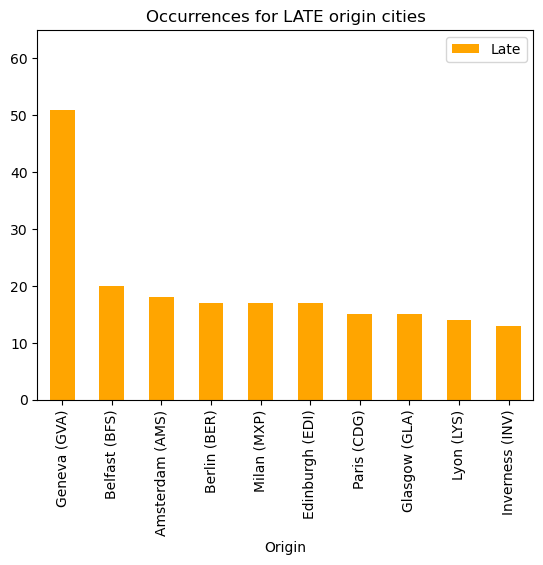

In [151]:
d1 = all_late.nlargest(10, 'Late')[['Origin', 'Late']]
d1.plot(x='Origin', y='Late', kind='bar', color='orange')
plt.title('Occurrences for LATE origin cities')
plt.ylim([0, 65])
plt.show()

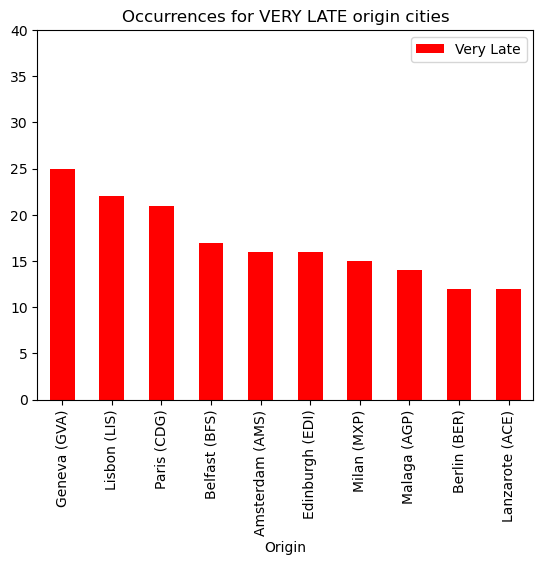

In [152]:
d2 = all_late.nlargest(10, 'Very Late')[['Origin', 'Very Late']]
d2.plot(x='Origin', y='Very Late', kind='bar', color='red')
plt.title('Occurrences for VERY LATE origin cities')
plt.ylim([0, 40])
plt.show()

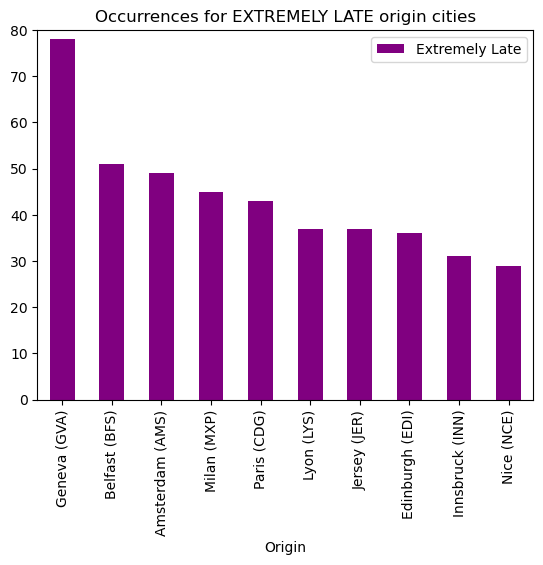

In [153]:
d3 = all_late.nlargest(10, 'Extremely Late')[['Origin', 'Extremely Late']]
d3.plot(x='Origin', y='Extremely Late', kind='bar', color='purple')
plt.title('Occurrences for EXTREMELY LATE origin cities')
plt.ylim([0, 80])

plt.show()

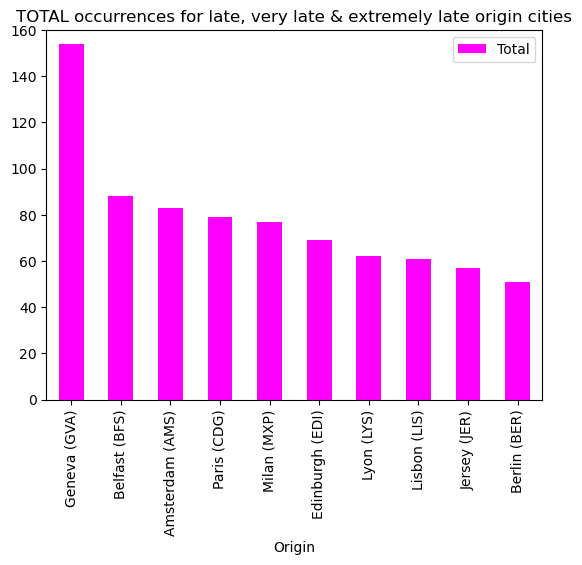

In [154]:
d4 = all_late.nlargest(10, 'Total')[['Origin', 'Total']]
d4.plot(x='Origin', y='Total', kind='bar', color='magenta')
plt.title('TOTAL occurrences for late, very late & extremely late origin cities')
plt.ylim([0, 160])

plt.show()

In [155]:
# getting cities TO  which flights are late
# l = late, vl = very late, el = extremely late
l_tos = list(late_dep['FROM'])
vl_tos = list(verylate_dep['FROM'])
el_tos = list(extlate_dep['FROM'])
l_tos_df = pd.DataFrame(Counter(l_tos), index=[0])
vl_tos_df = pd.DataFrame(Counter(vl_tos), index=[0])
el_tos_df = pd.DataFrame(Counter(el_tos), index=[0])

In [156]:
l_tos_dfT = l_tos_df.T.reset_index()
vl_tos_dfT = vl_tos_df.T.reset_index()
el_tos_dfT = el_tos_df.T.reset_index()

In [157]:
l_tos_dfT.columns = ["Destination", "Late"]
vl_tos_dfT.columns = ["Destination", "Very Late"]
el_tos_dfT.columns = ["Destination", "Extremely Late"]

In [158]:
lista_cdds_deps = (list(l_tos_dfT['Destination'].unique()) + list(vl_tos_dfT['Destination'].unique()) + list(el_tos_dfT['Destination'].unique()))
lista_cdds_deps = list(set(lista_cdds_deps))

In [159]:
all_late_temp_deps = l_tos_dfT.merge(vl_tos_dfT, how='outer', on='Destination')
all_late_deps = all_late_temp_deps.merge(el_tos_dfT, how='outer', on='Destination')

In [160]:
all_late_deps.replace(np.nan,0,inplace=True)

In [161]:
all_late_deps['Total'] = all_late_deps['Late'] + all_late_deps['Very Late'] + all_late_deps['Extremely Late']

In [162]:
all_late_deps.head()

,Destination,Late,Very Late,Extremely Late,Total
0,Naples (NAP),25.0,13.0,5.0,43.0
1,Enfidha (NBE),20.0,11.0,5.0,36.0
2,Seville (SVQ),35.0,14.0,1.0,50.0
3,Hurghada (HRG),29.0,30.0,6.0,65.0
4,Alicante (ALC),51.0,31.0,13.0,95.0


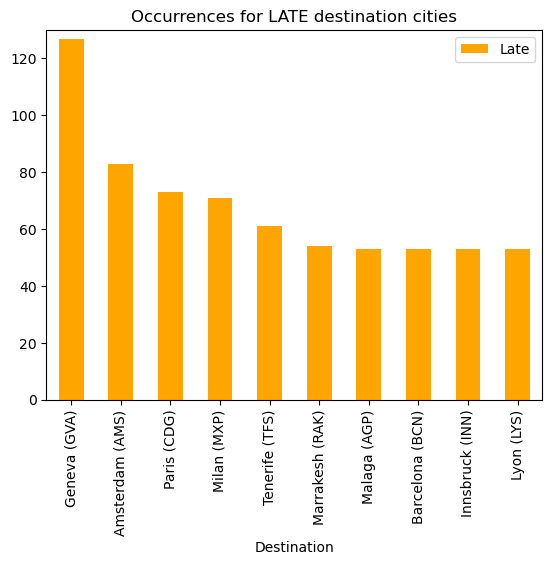

In [163]:
dep1 = all_late_deps.nlargest(10, 'Late')[['Destination', 'Late']]
dep1.plot(x='Destination', y='Late', kind='bar', color='orange')
plt.title('Occurrences for LATE destination cities')
plt.ylim([0, 130])
plt.show()

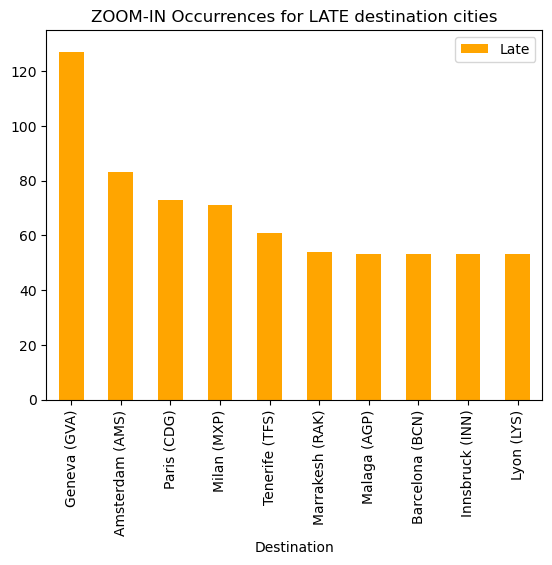

In [164]:
dep1_1 = all_late_deps.nlargest(10, 'Late')[['Destination', 'Late']]
dep1_1.plot(x='Destination', y='Late', kind='bar', color='orange')
plt.title('ZOOM-IN Occurrences for LATE destination cities')
plt.ylim([0, 135])
plt.show()

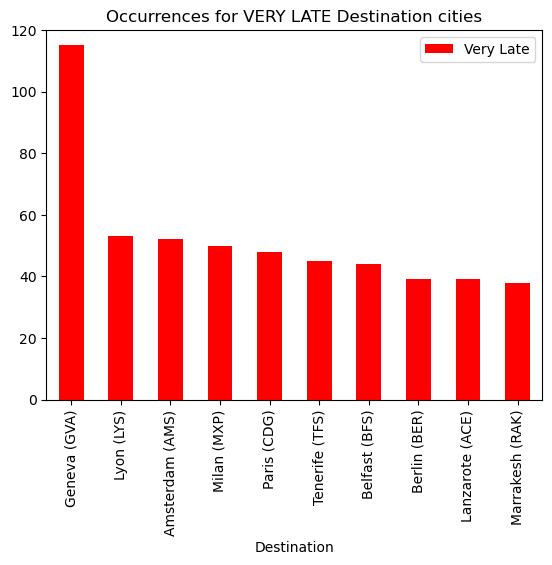

In [165]:
dep2 = all_late_deps.nlargest(10, 'Very Late')[['Destination', 'Very Late']]
dep2.plot(x='Destination', y='Very Late', kind='bar', color='red')
plt.title('Occurrences for VERY LATE Destination cities')
plt.ylim([0, 120])
plt.show()

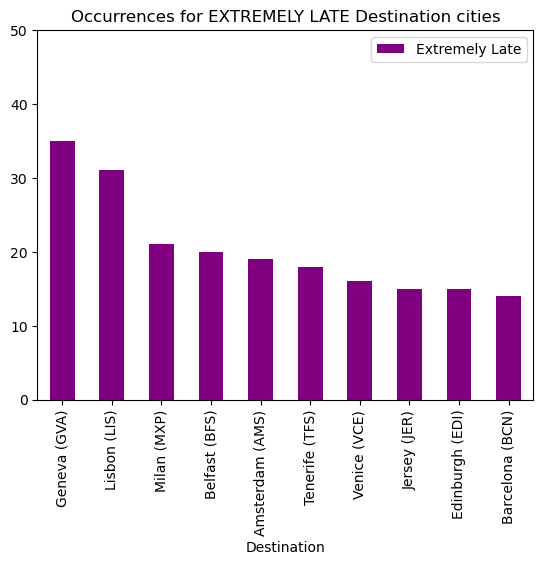

In [166]:
dep3 = all_late_deps.nlargest(10, 'Extremely Late')[['Destination', 'Extremely Late']]
dep3.plot(x='Destination', y='Extremely Late', kind='bar', color='purple')
plt.title('Occurrences for EXTREMELY LATE Destination cities')
plt.ylim([0, 50])

plt.show()

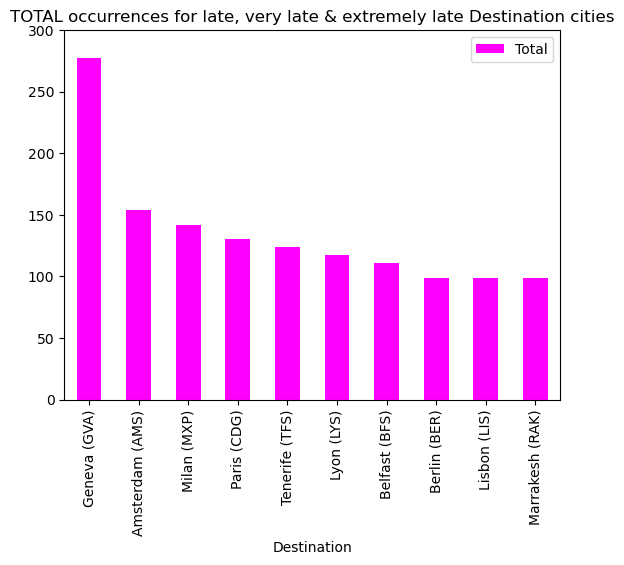

In [167]:
dep4 = all_late_deps.nlargest(10, 'Total')[['Destination', 'Total']]
dep4.plot(x='Destination', y='Total', kind='bar', color='magenta')
plt.title('TOTAL occurrences for late, very late & extremely late Destination cities')
plt.ylim([0, 300])

plt.show()

In [168]:
import plotly.graph_objects as go
alllate_origins = all_late.nlargest(10, 'Total')

cities=alllate_origins.nlargest(10, 'Total')['Origin']
fig = go.Figure(data=[
    go.Bar(name='Late', x=cities, y=alllate_origins['Late']),
    go.Bar(name='Very Late', x=cities, y=alllate_origins['Very Late']),
    go.Bar(name='Extremely Late', x=cities, y=alllate_origins['Extremely Late']),

])
fig.update_layout(barmode='stack', title = 'All late origin cities occurrences', yaxis_range=[0,300])
fig.show()

In [169]:
alllate_dests = all_late_deps.nlargest(10, 'Total')

cities=alllate_dests.nlargest(10, 'Total')['Destination']
fig = go.Figure(data=[
    go.Bar(name='Late', x=cities, y=alllate_dests['Late']),
    go.Bar(name='Very Late', x=cities, y=alllate_dests['Very Late']),
    go.Bar(name='Extremely Late', x=cities, y=alllate_dests['Extremely Late']),

])
fig.update_layout(barmode='stack', title = 'All late destination cities occurrences', yaxis_range=[0,300])
fig.show()

## RECOMMANDATIONS

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2985035767.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2985035767.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



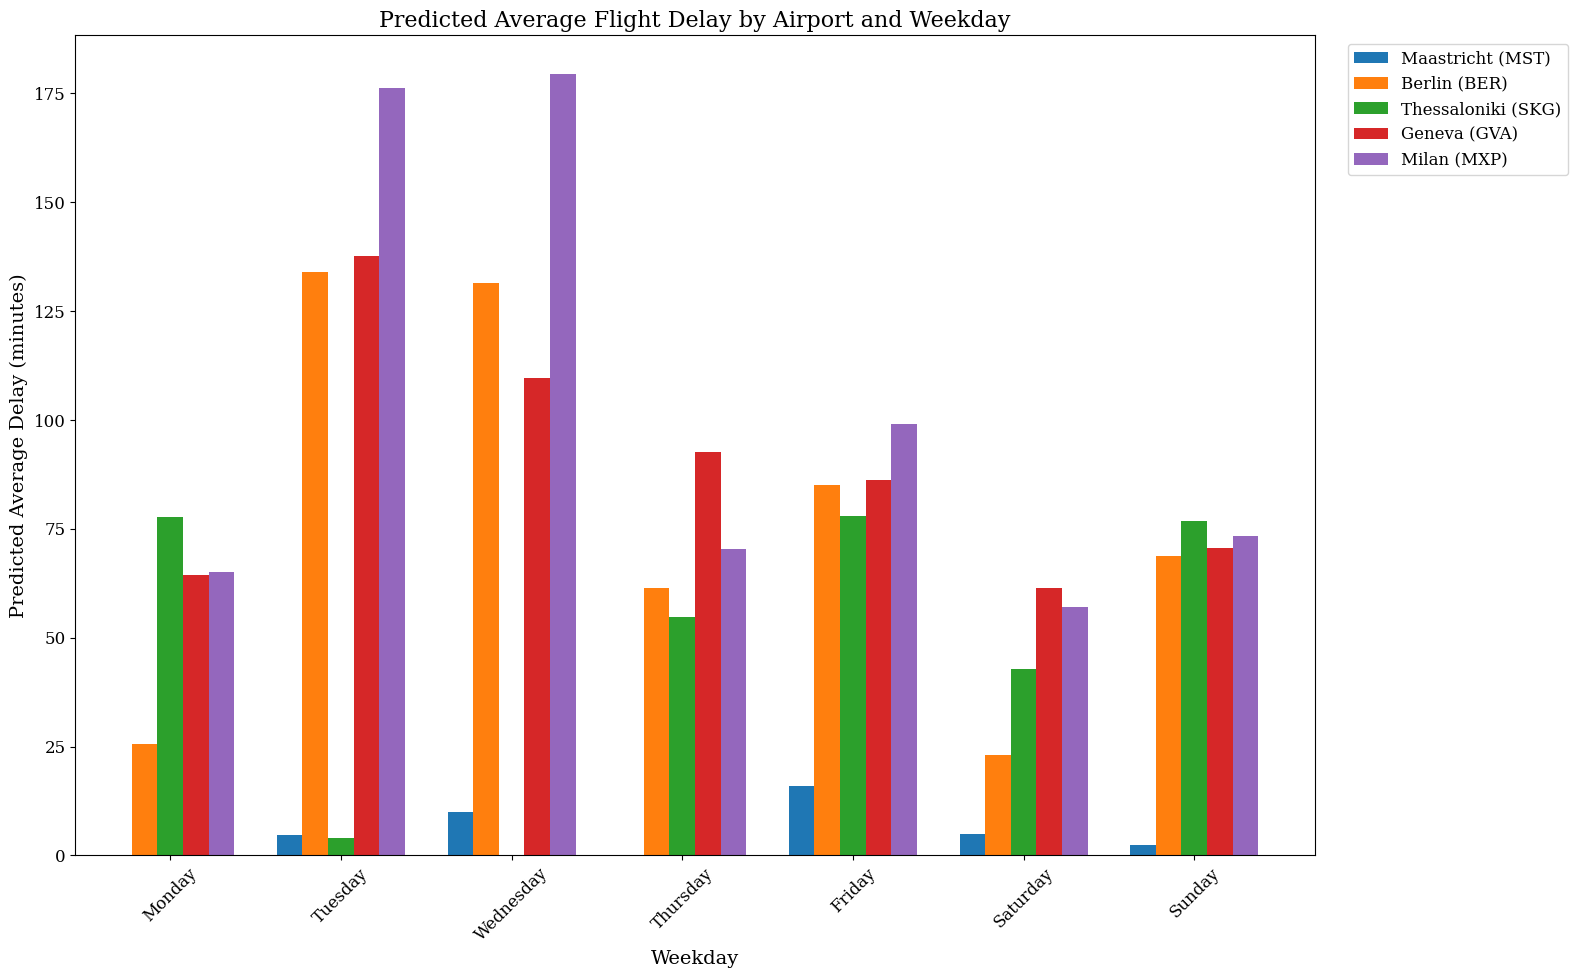

In [195]:
# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Prepare data for plotting
plot_data = []
for airport in ['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Milan (MXP)']:
    airport_data = []
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            airport_data.append(predictions[(airport, weekday)])
        else:
            airport_data.append(np.nan)
    plot_data.append(airport_data)

# Create a bar chart
plt.figure(figsize=(16, 10))
x = np.arange(7)
bar_width = 0.15
for i, airport_data in enumerate(plot_data):
    plt.bar(x + i * bar_width, airport_data, bar_width, label=['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Milan (MXP)'][i])

plt.xticks(x + bar_width * 2, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, fontsize=12)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Predicted Average Delay (minutes)', fontsize=14)
plt.title('Predicted Average Flight Delay by Airport and Weekday', fontsize=16)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

In [198]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Prepare data for plotting
plot_data = []
plot_text = []
for airport in ['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Belfast (BFS)', 'Amsterdam (AMS)', 'Milan (MXP)']:
    airport_data = []
    airport_text = []
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            airport_data.append(predictions[(airport, weekday)])
            airport_text.append(f"{predictions[(airport, weekday)]:.2f}")
        else:
            airport_data.append(np.nan)
            airport_text.append("")
    plot_data.append(airport_data)
    plot_text.append(airport_text)

# Create a Plotly bar chart
fig = go.Figure(data=[
    go.Bar(name=airport, x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=airport_data, text=airport_text)
    for airport, airport_data, airport_text in zip(['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Belfast (BFS)', 'Amsterdam (AMS)', 'Milan (MXP)'], plot_data, plot_text)
])
fig.update_traces(textposition='outside')
fig.update_layout(barmode='group', title='Predicted Average Flight Delay by Airport and Weekday', xaxis_title='Weekday', yaxis_title='Predicted Average Delay (minutes)')
fig.show()


/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/944970845.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/944970845.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Extract relevant columns
departure = departures[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
departure['DATE'] = pd.to_datetime(departure['DATE'])

# Add a 'Weekday' column
departure['Weekday'] = departure['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = departure.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Prepare data for plotting
plot_data = []
plot_text = []
for airport in ['Tenerife (TFS)', 'Berlin (BER)','Paris (CDG)' 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Belfast (BFS)', 'Amsterdam (AMS)', 'Milan (MXP)']:
    airport_data = []
    airport_text = []
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            airport_data.append(predictions[(airport, weekday)])
            airport_text.append(f"{predictions[(airport, weekday)]:.2f}")
        else:
            airport_data.append(np.nan)
            airport_text.append("")
    plot_data.append(airport_data)
    plot_text.append(airport_text)

# Create a Plotly bar chart
fig = go.Figure(data=[
    go.Bar(name=airport, x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=airport_data, text=airport_text)
    for airport, airport_data, airport_text in zip(['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Belfast (BFS)', 'Amsterdam (AMS)', 'Milan (MXP)'], plot_data, plot_text)
])
fig.update_traces(textposition='outside')
fig.update_layout(barmode='group', title='Predicted Average Flight Delay by Airport and Weekday', xaxis_title='Weekday', yaxis_title='Predicted Average Delay (minutes)')
fig.show()


/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2844576984.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2844576984.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
airports = ['Milan (LIN)', 'Milan (MXP)', 'Milan (BGY)']

# Define the function calculate_average_delay
def calculate_average_delay(arrivals, airports):
    # Filter the DataFrame for the selected airports and only late flights
    arrivals_filtered = arrivals[(arrivals['FROM'].isin(airports)) & (arrivals['Late or Early'] == 'Later')]
    
    # Check if the filtered DataFrame is empty
    if arrivals_filtered.empty:
        print("No late flights from the specified airports.")
        return None
    
    # Calculate the average delay per airport
    average_delay = arrivals_filtered.groupby('FROM')['Minute'].mean()
    
    # Return the result as a DataFrame for consistency with plotting code
    return average_delay.reset_index()

retard_moyen_par_aeroport = calculate_average_delay(arrivals, airports)

# Display the results
print(retard_moyen_par_aeroport)

          FROM      Minute
0  Milan (BGY)  162.866667
1  Milan (LIN)  114.615385
2  Milan (MXP)  192.591304


          FROM      Minute
0  Milan (BGY)  162.866667
1  Milan (LIN)  114.615385
2  Milan (MXP)  192.591304


<Figure size 1000x700 with 0 Axes>

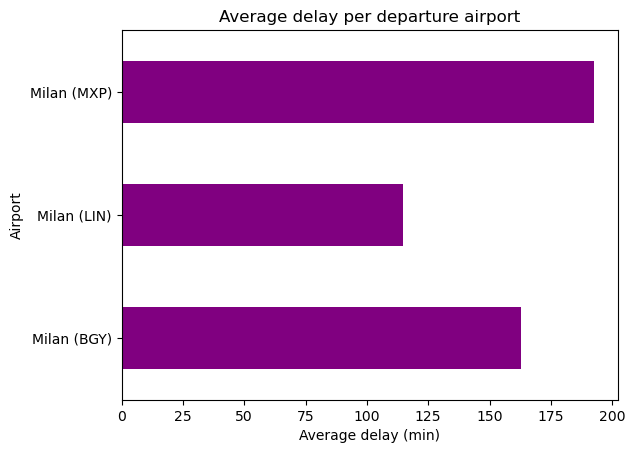

In [172]:
airports = ['Milan (LIN)', 'Milan (MXP)', 'Milan (BGY)']# Define the function calculate_average_delay
def calculate_average_delay(arrivals, airports):
    # Filter the DataFrame for the selected airports and only late flights
    arrivals_filtered = arrivals[(arrivals['FROM'].isin(airports)) & (arrivals['Late or Early'] == 'Later')]
    
    # Check if the filtered DataFrame is empty
    if arrivals_filtered.empty:
        print("No late flights from the specified airports.")
        return None
    
    # Calculate the average delay per airport
    average_delay = arrivals_filtered.groupby('FROM')['Minute'].mean()
    
    # Return the result as a DataFrame for consistency with plotting code
    return average_delay.reset_index()

retard_moyen_par_aeroport = calculate_average_delay(arrivals, airports)

# Display the results
print(retard_moyen_par_aeroport)


# Plotting the average delay per airport
plt.figure(figsize=(10, 7))
# Make sure 'FROM' and 'Minute' are the correct column names in your DataFrame
retard_moyen_par_aeroport.plot(kind='barh', x='FROM', y='Minute', color='purple', legend=False)
plt.title('Average delay per departure airport')
plt.xlabel('Average delay (min)')
plt.ylabel('Airport')
plt.show()

In [173]:
# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Print predictions for top 5 airports
Av_dweek_MilanLIN = ['Milan (LIN)']
for airport in Av_dweek_MilanLIN:
    print(f"{airport}:")
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            print(f"{weekday}: {int(predictions[(airport, weekday)])} minutes")
        else:
            print(f"{weekday}: No data")
    print()

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2439297192.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2439297192.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Milan (LIN):
Monday: 65 minutes
Tuesday: No data
Wednesday: 8 minutes
Thursday: 88 minutes
Friday: 76 minutes
Saturday: 209 minutes
Sunday: 68 minutes



In [174]:
lin = pd.read_excel('Classeur1.xls')
lin_late = lin[lin['Late or Early']=='Later']
lin_avg = pd.DataFrame(lin_late.groupby(['DATE'])['Minute'].mean())
lin_avg['No. of data points'] = lin_late['DATE'].value_counts()
lin_avg


,Minute,No. of data points
DATE,,
Friday,108.833333,6
Monday,93.500000,6
Saturday,150.000000,4
Sunday,105.333333,6
Thursday,133.500000,4


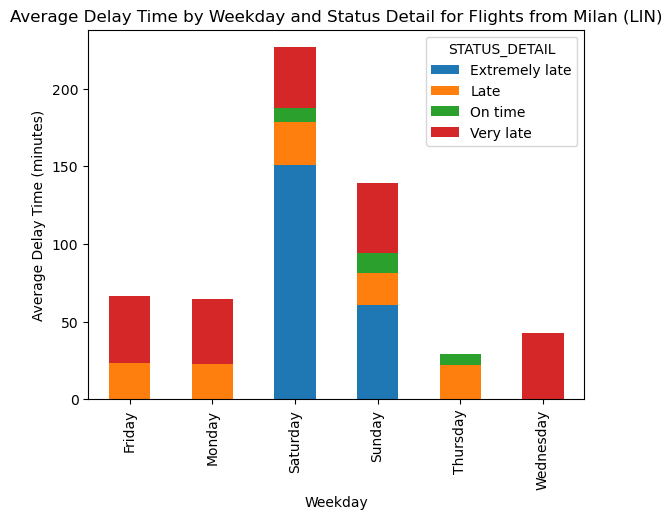

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.relativedelta import relativedelta

# Convert the DATE column to a datetime object
departures['DATE'] = pd.to_datetime(departures['DATE'])

# Define a function to get the weekday name from a datetime object
def get_weekday(date):
    return date.strftime('%A')

# Extract the weekday from the DATE column using the get_weekday function
departures['Weekday'] = departures['DATE'].apply(get_weekday)

# Group by Weekday and STATUS_DETAIL
x = departures[departures['FROM'] == 'Milan (LIN)'].groupby(["Weekday", "STATUS_DETAIL"])['Minute'].mean().reset_index()

# Filter out any rows with NaN values
x = x[x.notna().all(1)]

# Pivot the data to create separate columns for each STATUS_DETAIL
x = x.pivot(index='Weekday', columns='STATUS_DETAIL', values='Minute')

# Plot the bar plot
x.plot(kind='bar', stacked=True)
plt.title('Average Delay Time by Weekday and Status Detail for Flights from Milan (LIN)')
plt.xlabel('Weekday')
plt.ylabel('Average Delay Time (minutes)')
plt.show()

In [176]:
# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n

        # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Get unique airports
unique_airports = arrival['FROM'].unique()

# Print predictions for all airports
for airport in unique_airports:
    print(f"{airport}:")
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            print(f"{weekday}: {int(predictions[(airport, weekday)])} minutes")
        else:
            print(f"{weekday}: No data")
    print()



/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2378777847.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/2378777847.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Amsterdam (AMS):
Monday: 46 minutes
Tuesday: 111 minutes
Wednesday: 139 minutes
Thursday: 80 minutes
Friday: 76 minutes
Saturday: 43 minutes
Sunday: 73 minutes

Paris (CDG):
Monday: 60 minutes
Tuesday: 138 minutes
Wednesday: 126 minutes
Thursday: 86 minutes
Friday: 83 minutes
Saturday: 48 minutes
Sunday: 83 minutes

Geneva (GVA):
Monday: 64 minutes
Tuesday: 137 minutes
Wednesday: 109 minutes
Thursday: 92 minutes
Friday: 86 minutes
Saturday: 61 minutes
Sunday: 70 minutes

Edinburgh (EDI):
Monday: 25 minutes
Tuesday: 124 minutes
Wednesday: 103 minutes
Thursday: 58 minutes
Friday: 73 minutes
Saturday: 28 minutes
Sunday: 96 minutes

Aberdeen (ABZ):
Monday: 39 minutes
Tuesday: 172 minutes
Wednesday: 154 minutes
Thursday: 86 minutes
Friday: 94 minutes
Saturday: 49 minutes
Sunday: 100 minutes

Inverness (INV):
Monday: 35 minutes
Tuesday: 155 minutes
Wednesday: 143 minutes
Thursday: 83 minutes
Friday: 94 minutes
Saturday: 47 minutes
Sunday: 93 minutes

Jersey (JER):
Monday: 115 minutes
Tuesday

In [186]:
# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Print predictions for top 5 airports
Av_dweek_MilanLIN = ['Maastricht (MST)', 'Berlin (BER)', 'Thessaloniki (SKG)', 'Geneva (GVA)', 'Milan (MXP)']
for airport in Av_dweek_MilanLIN:
    print(f"{airport}:")
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            print(f"{weekday}: {int(predictions[(airport, weekday)])} minutes")
        else:
            print(f"{weekday}: No data")
    print()

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/100533268.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/100533268.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Maastricht (MST):
Monday: No data
Tuesday: 4 minutes
Wednesday: 10 minutes
Thursday: No data
Friday: 16 minutes
Saturday: 5 minutes
Sunday: 2 minutes

Berlin (BER):
Monday: 25 minutes
Tuesday: 133 minutes
Wednesday: 131 minutes
Thursday: 61 minutes
Friday: 85 minutes
Saturday: 23 minutes
Sunday: 68 minutes

Thessaloniki (SKG):
Monday: 77 minutes
Tuesday: 4 minutes
Wednesday: No data
Thursday: 54 minutes
Friday: 78 minutes
Saturday: 42 minutes
Sunday: 76 minutes

Geneva (GVA):
Monday: 64 minutes
Tuesday: 137 minutes
Wednesday: 109 minutes
Thursday: 92 minutes
Friday: 86 minutes
Saturday: 61 minutes
Sunday: 70 minutes

Milan (MXP):
Monday: 65 minutes
Tuesday: 176 minutes
Wednesday: 179 minutes
Thursday: 70 minutes
Friday: 99 minutes
Saturday: 57 minutes
Sunday: 73 minutes



In [178]:
# Extract relevant columns
departure = departures[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
departure['DATE'] = pd.to_datetime(departure['DATE'])

# Add a 'Weekday' column
departure['Weekday'] = departure['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = departure.groupby(['FROM', 'Weekday'])['Minute']
 
# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n

        # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Get unique airports
unique_airports = departure['FROM'].unique()

# Print predictions for all airports
for airport in unique_airports:
    print(f"{airport}:")
    for weekday in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        if (airport, weekday) in predictions:
            print(f"{weekday}: {int(predictions[(airport, weekday)])} minutes")
        else:
            print(f"{weekday}: No data")
    print()

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1720415287.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1720415287.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Maastricht (MST):
Monday: 11 minutes
Tuesday: 1 minutes
Wednesday: 1 minutes
Thursday: No data
Friday: No data
Saturday: No data
Sunday: 8 minutes

Naples (NAP):
Monday: 25 minutes
Tuesday: 12 minutes
Wednesday: 19 minutes
Thursday: 15 minutes
Friday: 31 minutes
Saturday: 25 minutes
Sunday: 26 minutes

Pafos (PFO):
Monday: 11 minutes
Tuesday: 27 minutes
Wednesday: 13 minutes
Thursday: 21 minutes
Friday: 21 minutes
Saturday: 35 minutes
Sunday: 19 minutes

Innsbruck (INN):
Monday: 20 minutes
Tuesday: 5 minutes
Wednesday: 9 minutes
Thursday: 17 minutes
Friday: 25 minutes
Saturday: 25 minutes
Sunday: 28 minutes

Gran Canaria (LPA):
Monday: 21 minutes
Tuesday: 15 minutes
Wednesday: 17 minutes
Thursday: 28 minutes
Friday: 24 minutes
Saturday: 34 minutes
Sunday: 42 minutes

Marrakesh (RAK):
Monday: 25 minutes
Tuesday: 23 minutes
Wednesday: 17 minutes
Thursday: 23 minutes
Friday: 26 minutes
Saturday: 34 minutes
Sunday: 31 minutes

Prague (PRG):
Monday: 18 minutes
Tuesday: 9 minutes
Wednesday: 

In [179]:
import pymc as pm
import pandas as pd
import numpy as np

monday_flights = lin[lin['DATE'] == 'Wednesday']

specific_flights = monday_flights[monday_flights['Time'] == '14:55']

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)
    
    delay_mean = alpha
    
    delay_obs = pm.Normal('delay_obs', mu=delay_mean, sigma=sigma, observed=specific_flights['Minute'])

    trace = pm.sample(1000, return_inferencedata=False)

predicted_delay = trace['alpha'].mean()
print(f'Predicted delay for a flight at 14:55 on Wednesday is {predicted_delay:.2f} minutes.')


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.


Predicted delay for a flight at 14:55 on Wednesday is -0.19 minutes.


/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1541823694.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1541823694.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



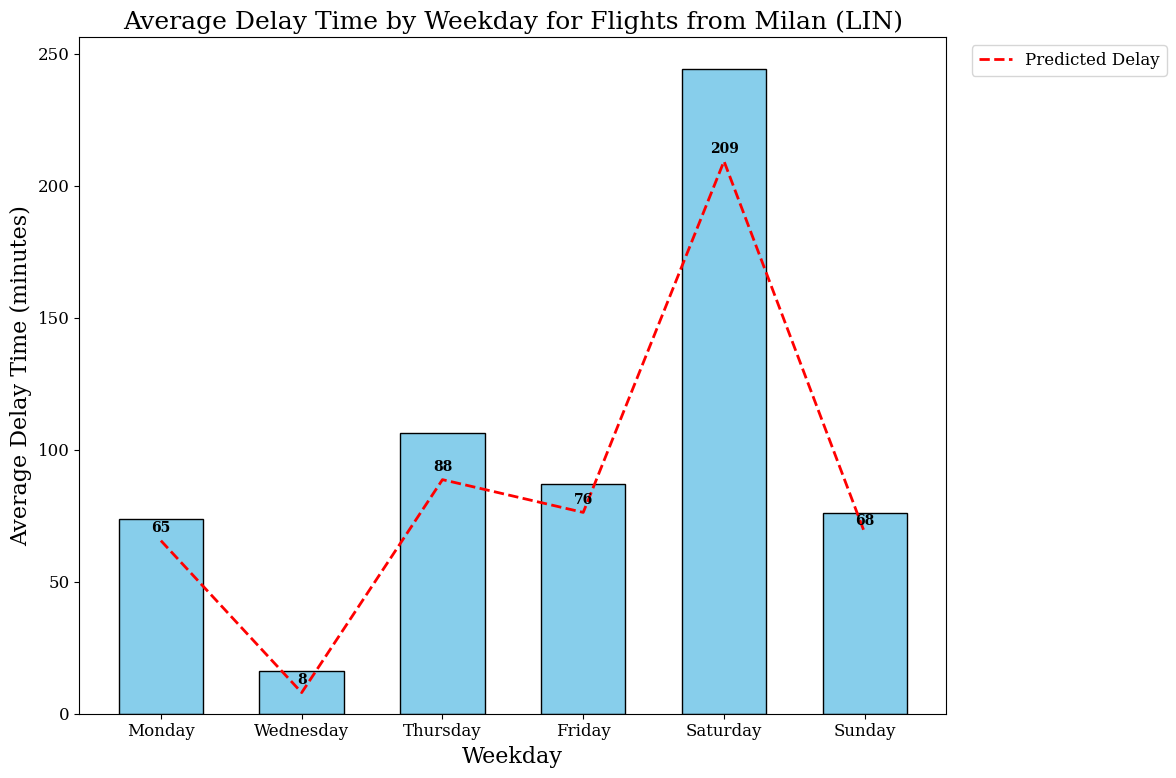

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Extract relevant columns
arrival = arrivals[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Prepare data for plotting
bar_data = arrival[arrival['FROM'] == 'Milan (LIN)'].groupby('Weekday')['Minute'].mean().reset_index()
bar_data['Weekday'] = pd.Categorical(bar_data['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
bar_data = bar_data.sort_values('Weekday')

# Set plot style
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar chart
x = np.arange(len(bar_data))
bar_width = 0.6
ax.bar(x, bar_data['Minute'], width=bar_width, color='skyblue', edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels(bar_data['Weekday'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Average Delay Time (minutes)')
ax.set_title('Average Delay Time by Weekday for Flights from Milan (LIN)', fontsize=18)

# Plot the predicted delay times as a line plot
weekdays = bar_data['Weekday'].tolist()
predicted_delays = [predictions[('Milan (LIN)', weekday)] for weekday in weekdays]
ax.plot(x, predicted_delays, 'r--', linewidth=2, label='Predicted Delay')

# Add predicted delay values on top of the line plot
for i, value in enumerate(predicted_delays):
    ax.text(x[i], value + 2, int(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [181]:
# DELAYS FOR BELFAST

# code for just looking at Belfast data

departures_copy = departures
departures_copy['short_FROM'] = departures_copy['FROM']
departures_copy['Airport'] = departures_copy['FROM']
for index, row in departures_copy.iterrows():
    departures_copy.at[index,'short_FROM'] = row['short_FROM'][:-6]
belfast = departures_copy[departures_copy['short_FROM'] == 'Belfast']
for index, row in belfast.iterrows():
    belfast.at[index,'Airport'] = row['Airport'][9:-1]
belfast['FROM'].value_counts()


Belfast (BFS)    230
Belfast (BHD)    145
Name: FROM, dtype: int64

In [182]:
airports_belfast = ['Belfast (BFS)', 'Belfast (BHD)']
delays_for_belfast = calculate_average_delay(departures, airports_belfast)
delays_for_belfast

,FROM,Minute
0,Belfast (BFS),25.750000
1,Belfast (BHD),19.460432


<Figure size 1000x700 with 0 Axes>

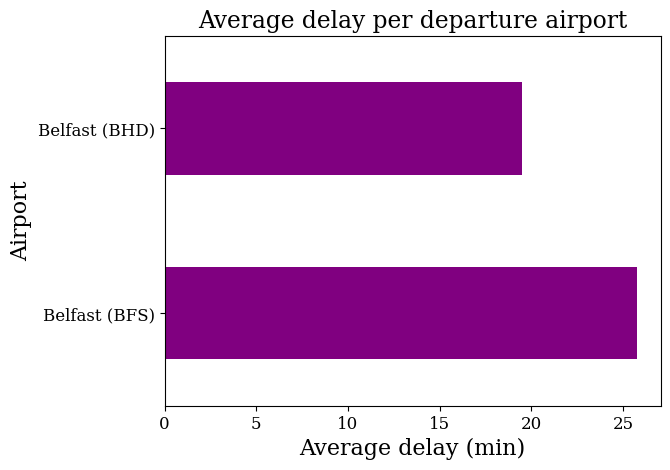

In [183]:
# Plotting the average delay for Belfast's airports
plt.figure(figsize=(10, 7))

delays_for_belfast.plot(kind='barh', x='FROM', y='Minute', color='purple', legend=False)
plt.title('Average delay per departure airport')
plt.xlabel('Average delay (min)')
plt.ylabel('Airport')
plt.show()

In [184]:
arrivals.columns

Index(['DATE', 'TIME', 'FLIGHT', 'FROM', 'AIRLINE', 'AIRCRAFT', 'STATUS',
       'STATUS_TIME', 'TIME DIFFERENCES', 'Late or Early', 'STATUS_DETAIL',
       'Minute'],
      dtype='object')

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1979269218.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/36/8x9wq3p96kj4qb2cb74tb69r0000gn/T/ipykernel_79529/1979269218.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



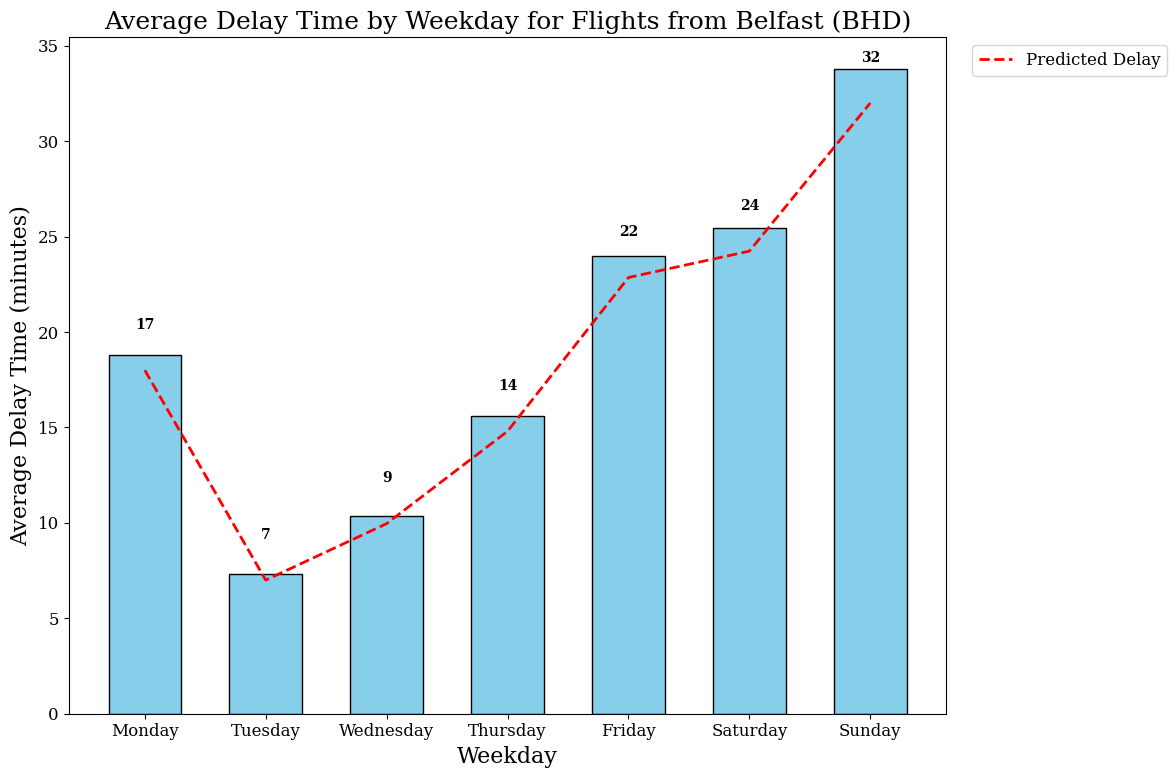

In [185]:
# Extract relevant columns
arrival = departures[['DATE', 'FROM', 'Minute']]

# Convert DATE to datetime
arrival['DATE'] = pd.to_datetime(arrival['DATE'])

# Add a 'Weekday' column
arrival['Weekday'] = arrival['DATE'].dt.day_name()

# Group the data by airport and weekday
data_grouped = arrival.groupby(['FROM', 'Weekday'])['Minute']

# Define prior distributions
mu_0 = 0  # Prior mean for normal distribution
sigma_0 = 1  # Prior standard deviation for normal distribution
alpha_0 = 1  # Prior shape parameter for gamma distribution
beta_0 = 1  # Prior rate parameter for gamma distribution

# Iterate over each airport-weekday combination
predictions = {}
for key, delays in data_grouped:
    airport, weekday = key
    
    # Calculate sufficient statistics
    n = len(delays)
    y_bar = delays.mean()
    s_sq = np.sum((delays - y_bar)**2)
    
    # Calculate posterior parameters
    mu_n = (mu_0 + n*y_bar) / (1 + n)
    sigma_n_sq = (1 + n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / (alpha_0 + n/2)
    alpha_n = alpha_0 + n/2
    beta_n = beta_0 + 0.5*(n*s_sq + n*mu_0*2 - (1 + n)*mu_n*2) / sigma_n_sq
    
    # Calculate predicted delay time
    predicted_delay = mu_n
    
    # Store prediction
    predictions[(airport, weekday)] = predicted_delay

# Prepare data for plotting
bar_data = arrival[arrival['FROM'] == 'Belfast (BHD)'].groupby('Weekday')['Minute'].mean().reset_index()
bar_data['Weekday'] = pd.Categorical(bar_data['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
bar_data = bar_data.sort_values('Weekday')

# Set plot style
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar chart
x = np.arange(len(bar_data))
bar_width = 0.6
ax.bar(x, bar_data['Minute'], width=bar_width, color='skyblue', edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels(bar_data['Weekday'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Average Delay Time (minutes)')
ax.set_title('Average Delay Time by Weekday for Flights from Belfast (BHD)', fontsize=18)

# Plot the predicted delay times as a line plot
weekdays = bar_data['Weekday'].tolist()
predicted_delays = [predictions[('Belfast (BHD)', weekday)] for weekday in weekdays]
ax.plot(x, predicted_delays, 'r--', linewidth=2, label='Predicted Delay')

# Add predicted delay values on top of the line plot
for i, value in enumerate(predicted_delays):
    ax.text(x[i], value + 2, int(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()